In [1]:
import pandas as pd

tsv_file_path = '../data/output_data_1/assignments_from_pool_42737992__24-01-2024.tsv'
df = pd.read_csv(tsv_file_path, sep='\t')
print(df)

                                            INPUT:meme  \
0    https://i.kym-cdn.com/photos/images/newsfeed/0...   
1    https://i.kym-cdn.com/photos/images/newsfeed/0...   
2    https://i.kym-cdn.com/photos/images/newsfeed/0...   
3    https://i.kym-cdn.com/photos/images/newsfeed/0...   
4    https://i.kym-cdn.com/photos/images/newsfeed/0...   
..                                                 ...   
154  https://i.kym-cdn.com/photos/images/newsfeed/0...   
155  https://i.kym-cdn.com/photos/images/newsfeed/0...   
156  https://i.kym-cdn.com/photos/images/newsfeed/0...   
157  https://i.kym-cdn.com/photos/images/newsfeed/0...   
158                                                NaN   

                                         INPUT:kymLink  \
0      https://knowyourmeme.com/memes/go-to-horny-jail   
1    https://knowyourmeme.com/memes/darth-vaders-noooo   
2    https://knowyourmeme.com/memes/the-worst-trade...   
3    https://knowyourmeme.com/memes/the-rocks-eyebr...   
4    https://

In [2]:
columns_to_drop = df.filter(regex='^(GOLDEN|HINT|ASSIGNMENT|OUTPUT:text_review_mode)').columns
df = df.drop(columns=columns_to_drop)

print("\nDataFrame after dropping columns:")
print(df)


DataFrame after dropping columns:
                                            INPUT:meme  \
0    https://i.kym-cdn.com/photos/images/newsfeed/0...   
1    https://i.kym-cdn.com/photos/images/newsfeed/0...   
2    https://i.kym-cdn.com/photos/images/newsfeed/0...   
3    https://i.kym-cdn.com/photos/images/newsfeed/0...   
4    https://i.kym-cdn.com/photos/images/newsfeed/0...   
..                                                 ...   
154  https://i.kym-cdn.com/photos/images/newsfeed/0...   
155  https://i.kym-cdn.com/photos/images/newsfeed/0...   
156  https://i.kym-cdn.com/photos/images/newsfeed/0...   
157  https://i.kym-cdn.com/photos/images/newsfeed/0...   
158                                                NaN   

                                         INPUT:kymLink  \
0      https://knowyourmeme.com/memes/go-to-horny-jail   
1    https://knowyourmeme.com/memes/darth-vaders-noooo   
2    https://knowyourmeme.com/memes/the-worst-trade...   
3    https://knowyourmeme.com/memes/

In [3]:
count_per_kymLink = df['INPUT:kymLink'].value_counts()

print("\nOccurrences per kymLink:")
print(count_per_kymLink)


Occurrences per kymLink:
INPUT:kymLink
https://knowyourmeme.com/memes/go-to-horny-jail                                  3
https://knowyourmeme.com/memes/dafuq                                             3
https://knowyourmeme.com/memes/feels-good                                        3
https://knowyourmeme.com/memes/florida-man                                       3
https://knowyourmeme.com/memes/darth-vaders-noooo                                3
https://knowyourmeme.com/memes/super-cool-ski-instructor                         3
https://knowyourmeme.com/memes/do-you-think-this-is-a-game                       3
https://knowyourmeme.com/memes/denied-encino-man                                 3
https://knowyourmeme.com/memes/look-how-they-massacred-my-boy                    3
https://knowyourmeme.com/memes/horse-sized-duck                                  3
https://knowyourmeme.com/memes/im-about-to-end-this-mans-whole-career            3
https://knowyourmeme.com/memes/how-do-you-do-fe

In [4]:
responses_with_meaning = df[df['OUTPUT:reason'].isna() | (df['OUTPUT:reason'] == '')]
responses_with_no_meaning = df[~df['OUTPUT:reason'].isna() & (df['OUTPUT:reason'] != '')]

print("DataFrame with responses where user was able to formulate meaning:")
print(responses_with_meaning.head())

print("DataFrame with responses where user said NO CLEAR MEANING:")
print(responses_with_no_meaning.head())

DataFrame with responses where user was able to formulate meaning:
                                          INPUT:meme  \
0  https://i.kym-cdn.com/photos/images/newsfeed/0...   
1  https://i.kym-cdn.com/photos/images/newsfeed/0...   
2  https://i.kym-cdn.com/photos/images/newsfeed/0...   
3  https://i.kym-cdn.com/photos/images/newsfeed/0...   
4  https://i.kym-cdn.com/photos/images/newsfeed/0...   

                                       INPUT:kymLink  \
0    https://knowyourmeme.com/memes/go-to-horny-jail   
1  https://knowyourmeme.com/memes/darth-vaders-noooo   
2  https://knowyourmeme.com/memes/the-worst-trade...   
3  https://knowyourmeme.com/memes/the-rocks-eyebr...   
4  https://knowyourmeme.com/memes/the-worst-trade...   

                                   INPUT:description OUTPUT:reason  \
0  Go to Horny Jail is a slang phrase associated ...           NaN   
1  Darth Vader's "Noooo!" refers to the widely pa...           NaN   
2  The Worst Trade Deal is an image macro series 

In [5]:
size_meaning = len(responses_with_meaning)
size_no_meaning = len(responses_with_no_meaning)

print("Size of DataFrame with meaning formulated", size_meaning)
print("Size of DataFrame with NO CLEAR MEANING", size_no_meaning)


Size of DataFrame with meaning formulated 144
Size of DataFrame with NO CLEAR MEANING 15


In [6]:
responses_with_no_meaning.loc[:, 'OUTPUT:reason'] = responses_with_no_meaning['OUTPUT:reason'].str.lower()
responses_with_no_meaning.loc[:, 'OUTPUT:isRelatable'] = responses_with_no_meaning['OUTPUT:isRelatable'].str.lower()

grouped_by_reason = responses_with_no_meaning.groupby('OUTPUT:reason').size().reset_index(name='Count')
grouped_by_relatability = responses_with_no_meaning.groupby('OUTPUT:isRelatable').size().reset_index(name='Count')

print("\nGrouped DataFrame for responses with NO CLEAR MEANING:")
print(grouped_by_reason)
print(grouped_by_relatability)


Grouped DataFrame for responses with NO CLEAR MEANING:
                OUTPUT:reason  Count
0  description not sufficient      4
1                  not a meme      9
2                other reason      2
  OUTPUT:isRelatable  Count
0                 no     13
1                yes      2


In [7]:
print("\nRows with relatability 'yes':")
print(responses_with_no_meaning[responses_with_no_meaning['OUTPUT:isRelatable'] == 'yes'])



Rows with relatability 'yes':
                                           INPUT:meme  \
67  https://i.kym-cdn.com/photos/images/newsfeed/0...   
98                   http://i.imgur.com/TO3Ed7u.png?1   

                                        INPUT:kymLink  \
67  https://knowyourmeme.com/memes/tuxedo-winnie-t...   
98               https://knowyourmeme.com/memes/gavin   

                                    INPUT:description  \
67  Tuxedo Winnie the Pooh, also known as "A Fello...   
98  Gavin is the nephew of Vine star Nick Mastodon...   

                 OUTPUT:reason                                OUTPUT:result  \
67  description not sufficient   {"No clear meaning in description":["as"]}   
98  description not sufficient  {"No clear meaning in description":["the"]}   

                                       OUTPUT:comment OUTPUT:meaning  \
67  This meme is used to indicate that someone is ...            NaN   
98     Description is not sufficient to get a meaning            NaN   

In [8]:
horny_jail_responses = responses_with_meaning[responses_with_meaning['INPUT:kymLink'] == 'https://knowyourmeme.com/memes/go-to-horny-jail']

print(horny_jail_responses)

                                           INPUT:meme  \
0   https://i.kym-cdn.com/photos/images/newsfeed/0...   
48  https://i.kym-cdn.com/photos/images/newsfeed/0...   
78  https://i.kym-cdn.com/photos/images/newsfeed/0...   

                                      INPUT:kymLink  \
0   https://knowyourmeme.com/memes/go-to-horny-jail   
48  https://knowyourmeme.com/memes/go-to-horny-jail   
78  https://knowyourmeme.com/memes/go-to-horny-jail   

                                    INPUT:description OUTPUT:reason  \
0   Go to Horny Jail is a slang phrase associated ...           NaN   
48  Go to Horny Jail is a slang phrase associated ...           NaN   
78  Go to Horny Jail is a slang phrase associated ...           NaN   

                                        OUTPUT:result OUTPUT:comment  \
0               {"Relevant to the meaning":["horny"]}            NaN   
48   {"Relevant to the meaning":["Go to Horny Jail"]}            NaN   
78  {"Relevant to the meaning":["as a reaction to

In [9]:
def filter_by_repeated_characters(df):
    # Filter out rows with NaN in 'OUTPUT:meaning'
    df = df.dropna(subset=['OUTPUT:meaning'])

    # Use str.contains to filter rows with repeated characters
    filtered_df = df[df['OUTPUT:meaning'].str.contains(r'(\.{5,}|/{5,}|-{5,})', na=False)]
    return filtered_df

total_responses_before = len(responses_with_meaning)
filtered_out_rows = filter_by_repeated_characters(responses_with_meaning)
responses_with_meaning = responses_with_meaning[~responses_with_meaning.index.isin(filtered_out_rows.index)]
total_responses_after = len(responses_with_meaning)

filtered_out_count = total_responses_before - total_responses_after
print("\nNumber of responses before filtering:", total_responses_before)
print("Number of responses after filtering:", total_responses_after)
print("Number of responses filtered out:", filtered_out_count)

pd.set_option('display.max_colwidth', None)

print("\nFiltered out rows:")
print(filtered_out_rows)



Number of responses before filtering: 144
Number of responses after filtering: 133
Number of responses filtered out: 11

Filtered out rows:
                                                           INPUT:meme  \
110  https://i.kym-cdn.com/photos/images/newsfeed/000/506/702/444.jpg   
114  https://i.kym-cdn.com/photos/images/newsfeed/000/290/698/c3e.jpg   
123  https://i.kym-cdn.com/photos/images/newsfeed/001/658/686/a79.png   
135  https://i.kym-cdn.com/photos/images/newsfeed/000/759/360/bc3.png   
137  https://i.kym-cdn.com/photos/images/newsfeed/001/470/802/25b.jpg   
139  https://i.kym-cdn.com/photos/images/newsfeed/001/510/174/121.jpg   
141  https://i.kym-cdn.com/photos/images/newsfeed/001/099/562/0d1.gif   
146  https://i.kym-cdn.com/photos/images/newsfeed/001/139/802/964.png   
150  https://i.kym-cdn.com/photos/images/newsfeed/001/505/717/49b.jpg   
154  https://i.kym-cdn.com/photos/images/newsfeed/001/070/332/b7a.jpg   
157  https://i.kym-cdn.com/photos/images/newsfeed/001/56

C:\Users\48795\AppData\Local\Temp\ipykernel_19596\1729267368.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df[df['OUTPUT:meaning'].str.contains(r'(\.{5,}|/{5,}|-{5,})', na=False)]


In [10]:
!pip install nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stop words and tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have a DataFrame named 'responses_with_meaning'
# Replace 'responses_with_meaning' with the actual name of your DataFrame if it's different

# Function to calculate cosine similarity for a given kymLink
def calculate_cosine_similarity(responses_for_kymLink):
    # Remove common stop words using NLTK
    stop_words = set(stopwords.words('english'))
    responses_for_kymLink['OUTPUT:meaning'] = responses_for_kymLink['OUTPUT:meaning'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

    # Use TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(responses_for_kymLink['OUTPUT:meaning'])

    # Calculate cosine similarity
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

    return similarity_matrix

# Create an empty DataFrame to store results
similar_kymLinks_data = []

# Group by kymLink and calculate similarity for each group
grouped_by_kymLink = responses_with_meaning.groupby('INPUT:kymLink')

for kymLink, group in grouped_by_kymLink:
    if len(group) >= 3:  # Ensure there are at least 3 responses for a meaningful similarity calculation
        # Calculate cosine similarity matrix for the group
        similarity_matrix = calculate_cosine_similarity(group)

        # Calculate average cosine similarity for the group
        avg_similarity = similarity_matrix.mean()

        # Store the results in the list
        similar_kymLinks_data.append({
            'kymLink': kymLink,
            'Avg Cosine Similarity': avg_similarity
        })

# Create a DataFrame from the list
similar_kymLinks_df = pd.DataFrame(similar_kymLinks_data)

# Sort the DataFrame by cosine similarity in descending order
similar_kymLinks_df = similar_kymLinks_df.sort_values(by='Avg Cosine Similarity', ascending=False)

# Print the top and bottom 3 kymLinks based on similarity
top_3_kymLinks = similar_kymLinks_df.head(3)
bottom_3_kymLinks = similar_kymLinks_df.tail(3)

print("\nTop 3 kymLinks with Most Similar Responses:")
print(top_3_kymLinks)

print("\nBottom 3 kymLinks with Least Similar Responses:")
print(bottom_3_kymLinks)


You should consider upgrading via the 'C:\Users\48795\Desktop\inzynierka\Pyro\research_project\Scripts\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\48795\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\48795\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Top 3 kymLinks with Most Similar Responses:
                                                                  kymLink  \
16  https://knowyourmeme.com/memes/im-about-to-end-this-mans-whole-career   
22                 https://knowyourmeme.com/memes/the-rocks-eyebrow-raise   
12                        https://knowyourmeme.com/memes/go-to-horny-jail   

    Avg Cosine Similarity  
16               0.403878  
22               0.397047  
12               0.387417  

Bottom 3 kymLinks with Least Similar Responses:
                                                                          kymLink  \
4                               https://knowyourmeme.com/memes/darth-vaders-noooo   
3                              https://knowyourmeme.com/memes/but-its-honest-work   
28  https://knowyourmeme.com/memes/you-vs-the-guy-she-told-you-not-to-worry-about   

    Avg Cosine Similarity  
4                0.333333  
3                0.333333  
28               0.333333  


In [11]:
target_kymLink = "https://knowyourmeme.com/memes/im-about-to-end-this-mans-whole-career"
target_rows = responses_with_meaning[responses_with_meaning['INPUT:kymLink'] == target_kymLink]

print(target_rows)

target_kymLink = "https://knowyourmeme.com/memes/you-vs-the-guy-she-told-you-not-to-worry-about"
target_rows = responses_with_meaning[responses_with_meaning['INPUT:kymLink'] == target_kymLink]

print(target_rows)


                                                           INPUT:meme  \
89   https://i.kym-cdn.com/photos/images/newsfeed/001/467/098/949.jpg   
99   https://i.kym-cdn.com/photos/images/newsfeed/001/467/098/949.jpg   
153  https://i.kym-cdn.com/photos/images/newsfeed/001/467/098/949.jpg   

                                                             INPUT:kymLink  \
89   https://knowyourmeme.com/memes/im-about-to-end-this-mans-whole-career   
99   https://knowyourmeme.com/memes/im-about-to-end-this-mans-whole-career   
153  https://knowyourmeme.com/memes/im-about-to-end-this-mans-whole-career   

                                                                                                                                                                                                                                                                                                                       INPUT:description  \
89   I'm About to End This Man's Whole Career refers to a memo

In [12]:
import json

input_data_json_path = '../data/input_data_1/input_data_processed.json'
with open(input_data_json_path, 'r', encoding='utf-8') as file:
    input_data_json = json.load(file)

# Continue with the rest of your code
input_data_df = pd.DataFrame([
    {
        'meme': entry['input_values']['meme'],
        'description': entry['input_values']['description'],
        'kymLink': entry['input_values']['kymLink'],
    }
    for entry in input_data_json
])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\48795\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Unique Similar Pairs:
Mr. Incredible Becoming Uncanny are a series of memes based on edited images of character Mr. Incredible in which he appears increasingly traumatized. The format, which gained popularity on YouTube and TikTok in December 2021, is a development of July 2021 Traumatized Mr. Incredible meme format.
---
Traumatized Mr. Incredible refers to a series of comparison memes based on two images of Mr. Incredible, one an official art for The Incredibles 2 and the other a "reverse toonified" and black-and-white version of the character that gives him an expression of a man experiencing emotional pain, similar to Withered Wojak. Starting in September 2021, the format was used together with the caption People Who Don't Know / People Who Know in comparison memes.
Similarity: 0.4764


Sad Frog is a cartoon drawing of a depressed-looking frog, often accompanied by the text “Feels Bad Man” or “You Will Never X”. It is used to denote feelings of failure or disappointment, either 

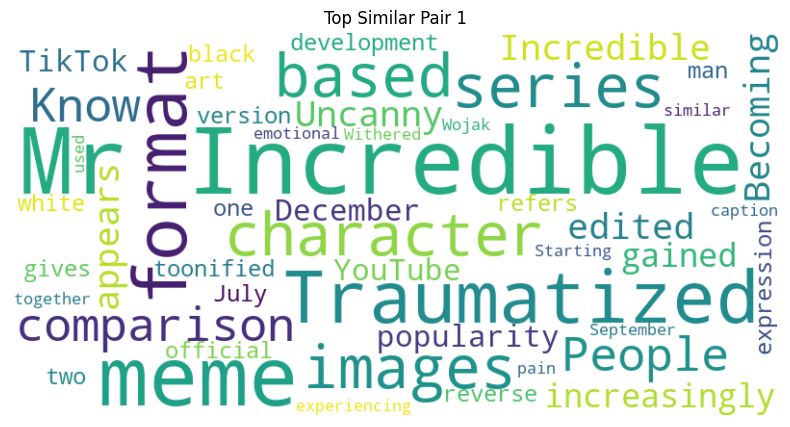

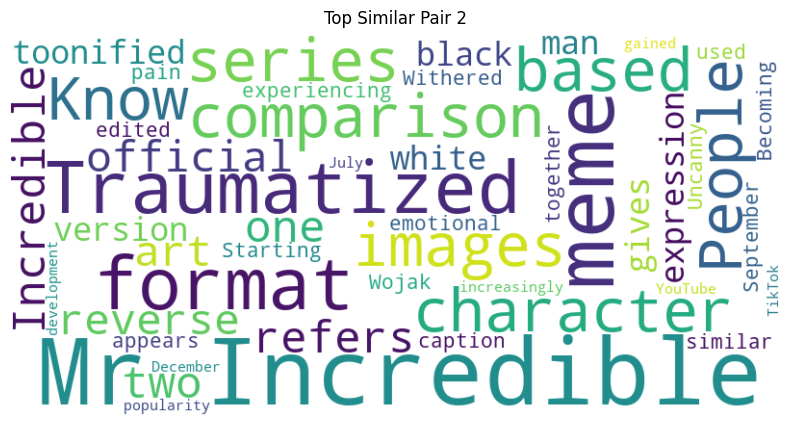

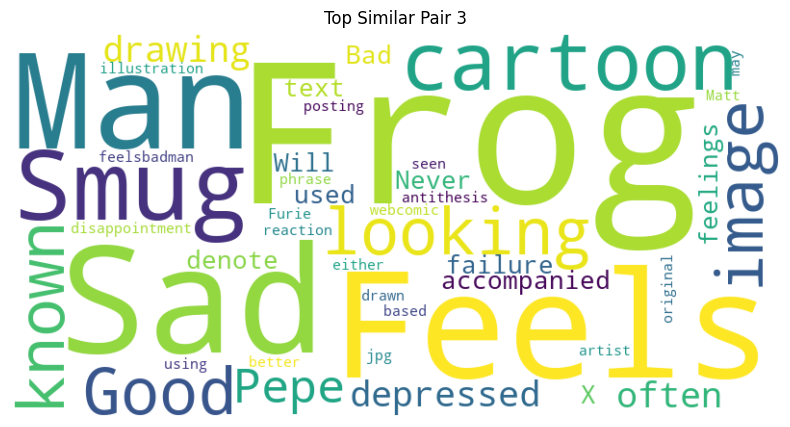

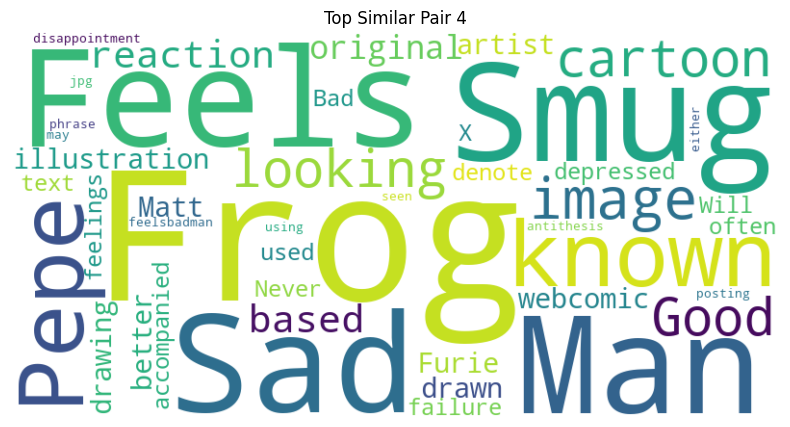

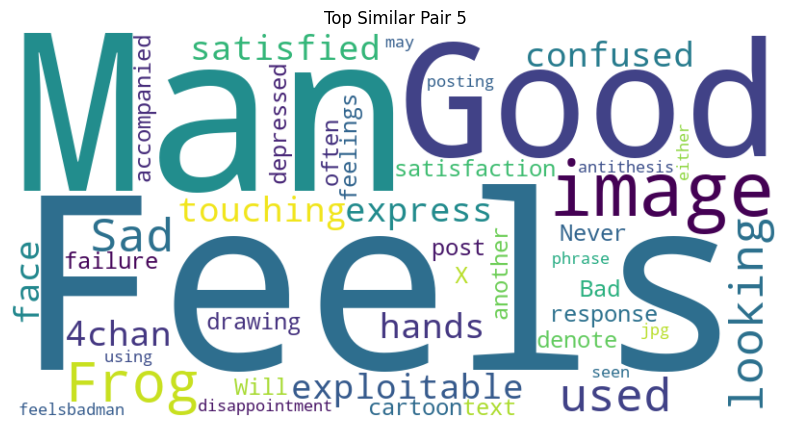

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')

# Assuming input_data_df is your DataFrame with a 'description' column
unique_descriptions = input_data_df['description'].unique()

stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words='english').fit_transform(unique_descriptions)
descriptions_matrix = vectorizer.toarray()

cosine_sim = cosine_similarity(descriptions_matrix, descriptions_matrix)

# Flatten the upper triangle of the cosine similarity matrix to get unique pairs
indices = [(i, j) for i in range(cosine_sim.shape[0]) for j in range(i+1, cosine_sim.shape[1])]
index_pairs = sorted(indices, key=lambda x: cosine_sim[x[0], x[1]], reverse=True)

print("Top Unique Similar Pairs:")
count = 0
seen_pairs = set()
for pair in index_pairs:
    if count >= 3:
        break
    if pair[0] != pair[1] and pair not in seen_pairs:
        similarity = cosine_sim[pair[0], pair[1]]
        print(f"{input_data_df['description'].iloc[pair[0]]}\n---\n{input_data_df['description'].iloc[pair[1]]}\nSimilarity: {similarity:.4f}\n\n")
        seen_pairs.add(pair)
        count += 1

print("Worst Unique Similar Pairs:")
count = 0
for pair in reversed(index_pairs):
    if count >= 3:
        break
    if pair[0] != pair[1] and pair not in seen_pairs:
        similarity = cosine_sim[pair[0], pair[1]]
        print(f"{input_data_df['description'].iloc[pair[0]]}\n---\n{input_data_df['description'].iloc[pair[1]]}\nSimilarity: {similarity:.4f}\n\n")
        seen_pairs.add(pair)
        count += 1

indices = cosine_sim.argsort(axis=None)[::-1]
index_pairs = [(index // cosine_sim.shape[0], index % cosine_sim.shape[0]) for index in indices]
top_pairs = [pair for pair in index_pairs if pair[0] != pair[1] and cosine_sim[pair[0], pair[1]] < 1][:5]

for i, (pair1, pair2) in enumerate(top_pairs, 1):
    description1 = input_data_df['description'].iloc[pair1]
    description2 = input_data_df['description'].iloc[pair2]
    
    combined_description = description1 + ' ' + description2
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_description)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top Similar Pair {i}')
    plt.show()
